In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>div.container { width:100% !important; }</style>"))

In [7]:
import numpy as np
x = np.array([2, 8 , 3, 7, 1, 2, 0, 4, 5])
w = np.array([2,1,5,3])
w

array([2, 1, 5, 3])

In [8]:
w_r = np.flip(w)
w_r

array([3, 5, 1, 2])

In [18]:
for i in range(6):
    print(np.dot(x[i:i+4], w_r.reshape(-1,1)))

[63]
[48]
[49]
[28]
[21]
[20]


In [14]:
a = np.dot(x[i:i+4], w_r)
a.shape

()

In [17]:
a = np.array([1,2,3,4])
b = np.array([11,12,13,14])
np.dot(a,b)

130

In [19]:
from scipy.signal import convolve
convolve(x,w, mode = 'valid')

array([63, 48, 49, 28, 21, 20])

In [20]:
from scipy.signal import correlate
correlate(x,w, mode='valid')

array([48, 57, 24, 25, 16, 39])

In [21]:
correlate(x,w,mode='full')

array([ 6, 34, 51, 48, 57, 24, 25, 16, 39, 29, 13, 10])

In [22]:
correlate(x,w,mode='same')

array([34, 51, 48, 57, 24, 25, 16, 39, 29])

In [24]:
x = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]
             ])
w = np.array([[2,0],[0,0]])

from scipy.signal import correlate2d
correlate2d(x,w,mode='valid')

array([[ 2,  4],
       [ 8, 10]])

In [25]:
correlate2d(x,w,mode='same')

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

(1, 3, 3, 1)


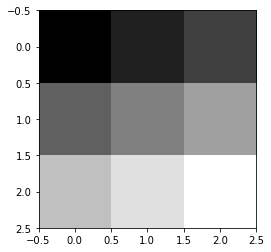

In [30]:
import tensorflow as tf
import numpy as np
import keras
from keras.layers import *
import matplotlib.pyplot as plt
image = tf.constant([[[[1],[2],[3]],
                      [[4],[5],[6]],
                      [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)
plt.imshow(image.numpy().reshape(3,3),cmap='gray')

In [34]:
a = np.array([1,2])
print(a)
print(len(a))
print(a.ndim)
print(a.shape)

[1 2]
2
1
(2,)


In [42]:
a = np.array([ [1,2], [3,4]])
print(a)
print(len(a))
print(len(a[0]))
print(a.ndim)
print(a.shape)


[[1 2]
 [3 4]]
2
2
2
(2, 2)


In [47]:
a = np.array([[[1,2],[3,4]],[[5,6],[7,8]]])
a[0][1][0]
print(len(a))
print(len(a[0]))
print(len(a[1]))
print(len(a[0][0]))
print(a.ndim)
print(a.shape)

2
2
2
2
3
(2, 2, 2)


In [51]:
a = np.array( [ [  [ [1],[2] ],[ [3],[4] ] ],
                [  [ [5],[6] ],[ [7],[8] ] ]
              ])
print(len(a))
print(len(a[0]))
print(len(a[0][0][0]))

2
2
1


In [55]:
a = np.array( [ [ [ [1],[2],[3] ], [[4],[5],[6]], [[7],[8],[9]] ] ])
print(len(a))
print(len(a[0]))
print(len(a[0][0]))
print(len(a[0][0][0]))

1
3
3
1


In [56]:
image

<tf.Tensor: shape=(1, 3, 3, 1), dtype=float32, numpy=
array([[[[1.],
         [2.],
         [3.]],

        [[4.],
         [5.],
         [6.]],

        [[7.],
         [8.],
         [9.]]]], dtype=float32)>

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d.shape (1, 3, 3, 1)
[[15. 20. 18.]
 [30. 35. 30.]
 [14. 16. 18.]]


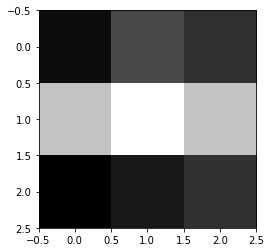

In [62]:
print("image.shape", image.shape)
weight = np.array([[[[1.]],[[1.]]],[[[2.]],[[1.]]]])
print("weight.shape", weight.shape)
weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=1, kernel_size=2, padding='same', kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
print(conv2d.numpy().reshape(3,3))
plt.imshow(conv2d.numpy().reshape(3,3), cmap='gray')

In [73]:
## test
weight = np.array([ 2,0,2,2])
print("weight.shape=", weight.shape)
weight_init = tf.constant_initializer(weight)

conv2d = tf.keras.layers.Conv2D(filters=1, kernel_size=2, padding='same', kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
print(conv2d.numpy().reshape(3,3))
plt.imshow(conv2d.numpy().reshape(3,3), cmap='gray')
plt.show()

weight.shape= (3,)


TypeError: Eager execution of tf.constant with unsupported shape (value has 3 elements, shape is (2, 2, 1, 1) with 4 elements).

In [66]:
print(weight_init.value)

[2 0 2 1]


In [3]:
import tensorflow as tf
import numpy as np
import keras
from keras.layers import *
import matplotlib.pyplot as plt
image = tf.constant( [[ 
[[1,0,1],[1,1,1],[1,1,1],[0,0,1],[0,1,0]], 
[[0,0,1],[1,1,1],[1,1,1],[1,1,1],[0,0,0]], 
[[0,0,0],[0,0,0],[1,1,0],[1,1,1],[1,0,1]], 
[[0,0,0],[0,0,1],[1,1,1],[1,1,1],[0,1,0]], 
[[0,1,0],[1,1,1],[1,1,1],[0,0,0],[0,0,0]] 
]], dtype=np.float32)
maps = np.swapaxes(image, 0, 3)
for i, map in enumerate(maps):
    print(map.reshape(5,5))


[[1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1.]
 [0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 0.]]
[[0. 1. 1. 0. 1.]
 [0. 1. 1. 1. 0.]
 [0. 0. 1. 1. 0.]
 [0. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0.]]
[[1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 0.]
 [0. 0. 0. 1. 1.]
 [0. 1. 1. 1. 0.]
 [0. 1. 1. 0. 0.]]


In [6]:
weight = np.array( [ 
[[[1],[0],[-1]], [[0],[-1],[0]], [[1],[0],[0]]],
[[[0],[-1],[0]], [[1],[1],[1]], [[0],[-1],[0]]],
[[[1],[1],[0]], [[0],[-1],[0]], [[1],[0],[-1]]]
] )
maps = np.swapaxes(weight, 0, 2)
#maps = np.swapaxes(maps, 1, 2)
for i, map in enumerate(maps):
    print(map.reshape(3,3))


[[1 0 1]
 [0 1 0]
 [1 0 1]]
[[ 0 -1  1]
 [-1  1 -1]
 [ 0 -1  0]]
[[-1  0  0]
 [ 0  1  0]
 [ 0  0 -1]]


In [7]:
weight = np.array( [ 
[[[1],[0],[-1]], [[0],[-1],[0]], [[1],[0],[0]]],
[[[0],[-1],[0]], [[1],[1],[1]], [[0],[-1],[0]]],
[[[1],[1],[0]], [[0],[-1],[0]], [[1],[0],[-1]]]
] )
maps = np.swapaxes(weight, 0, 2)
maps = np.swapaxes(maps, 1, 2)
for i, map in enumerate(maps):
    print(map.reshape(3,3))


[[1 0 1]
 [0 1 0]
 [1 0 1]]
[[ 0 -1  0]
 [-1  1 -1]
 [ 1 -1  0]]
[[-1  0  0]
 [ 0  1  0]
 [ 0  0 -1]]


In [4]:
weight = np.array( [ 
[[[1],[0],[-1]], [[0],[-1],[0]], [[1],[0],[0]]],
[[[0],[-1],[0]], [[1],[1],[1]], [[0],[-1],[0]]],
[[[1],[1],[0]], [[0],[-1],[0]], [[1],[0],[-1]]]
] )
maps = np.swapaxes(weight, 1, 2)
maps = np.swapaxes(maps, 0, 1)
for i, map in enumerate(maps):
    print(map.reshape(3,3))


[[1 0 1]
 [0 1 0]
 [1 0 1]]
[[ 0 -1  0]
 [-1  1 -1]
 [ 1 -1  0]]
[[-1  0  0]
 [ 0  1  0]
 [ 0  0 -1]]


In [11]:
weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=1, kernel_size=3, padding='valid', 
kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
feature_maps = np.swapaxes(conv2d, 0, 0)
for i, feature_map in enumerate(feature_maps):
    print(feature_map.reshape(3,3))

conv2d.shape (1, 3, 3, 1)
[[ 3. -1.  3.]
 [-2.  0.  2.]
 [ 1.  3.  4.]]


In [13]:
weight = np.array( [ 
[[[1,1],[0,1],[-1,-1]], [[0,0],[-1,0],[0,0]], [[1,1],[0,1],[0,0]]],
[[[0,0],[-1,0],[0,0]], [[1,1],[1,1],[1,1]], [[0,0],[-1,0],[0,0]]],
[[[1,1],[1,1],[0,0]], [[0,0],[-1,0],[0,0]], [[1,1],[0,1],[-1,-1]]]
] )
maps = np.swapaxes(weight, 1, 2)
maps = np.swapaxes(maps, 0, 1)
for map in maps:
    map = np.swapaxes(map, 1, 2)
    map = np.swapaxes(map, 0, 1)
    for filter in map:
        print(filter)


[[1 0 1]
 [0 1 0]
 [1 0 1]]
[[1 0 1]
 [0 1 0]
 [1 0 1]]
[[ 0 -1  0]
 [-1  1 -1]
 [ 1 -1  0]]
[[1 0 1]
 [0 1 0]
 [1 0 1]]
[[-1  0  0]
 [ 0  1  0]
 [ 0  0 -1]]
[[-1  0  0]
 [ 0  1  0]
 [ 0  0 -1]]


In [14]:
weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=2, kernel_size=3, padding='valid', 
kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape) # ( 1,3,3,2)
feature_maps = np.swapaxes(conv2d, 0, 3)
for feature_map in feature_maps:
    print(feature_map.reshape(3,3))

conv2d.shape (1, 3, 3, 2)
[[ 3. -1.  3.]
 [-2.  0.  2.]
 [ 1.  3.  4.]]
[[7. 5. 7.]
 [2. 6. 7.]
 [5. 7. 8.]]


In [15]:
image = tf.constant([[[[4],[3]],[[2],[1]]]], dtype=np.float32)
pool = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=1, padding='valid')(image)
print(pool.shape)
print(pool.numpy())


(1, 1, 1, 1)
[[[[4.]]]]


In [16]:
image = tf.constant([[[[4],[3]],[[2],[1]]]], dtype=np.float32)
pool = keras.layers.MaxPool2D(pool_size=(2,2), strides=1, padding='same')(image)
print(pool.shape)
print(pool.numpy())

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


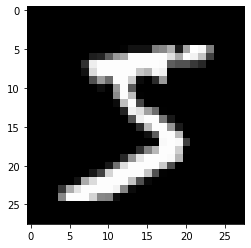

In [21]:
mnist = keras.datasets.mnist
class_names = ['0','1','2','3','4','5','6','7','8','9']
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.
img = train_images[0]
plt.imshow( img, cmap='gray')
plt.show()


In [22]:
img.shape

(28, 28)

conv2d.shape (1, 14, 14, 5)


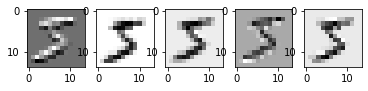

In [23]:
img = img.reshape(-1,28,28,1)
img = tf.convert_to_tensor(img)
#print("weight.shpe", weight.shape)
weight_init = keras.initializers.RandomNormal(stddev=0.01)
conv2d = keras.layers.Conv2D(filters=5, kernel_size=3, padding='same', 
strides=(2,2), kernel_initializer=weight_init)(img)
print("conv2d.shape", conv2d.shape)
feature_maps = np.swapaxes(conv2d, 0, 3)
for i, feature_map in enumerate(feature_maps):
    plt.subplot(1,5,i+1), plt.imshow(feature_map.reshape(14,14), cmap='gray')
plt.show()


(1, 7, 7, 5)


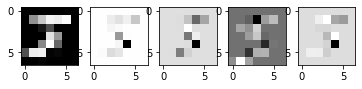

In [24]:
pool = keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same')(conv2d)
print(pool.shape)
feature_maps = np.swapaxes(pool, 0, 3)
for i, feature_map in enumerate(feature_maps):
    plt.subplot(1,5,i+1), plt.imshow(feature_map.reshape(7,7), cmap='gray')
plt.show()

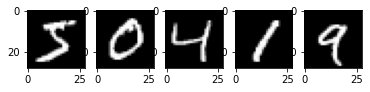

In [54]:
img = train_images[:5]
for i, map in enumerate(img):
    plt.subplot(1,5,i+1),plt.imshow(map.reshape(28,28),cmap='gray')
plt.show()

In [55]:
img.shape

(5, 28, 28)

In [56]:
img = img.reshape(-1,28,28,1)
print(img.shape)

(5, 28, 28, 1)


conv2d.shape:  (5, 14, 14, 5)


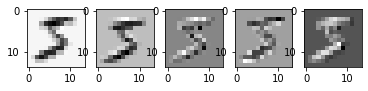

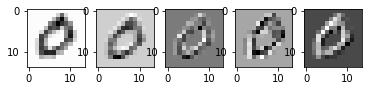

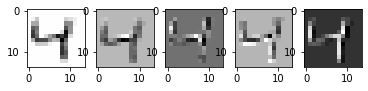

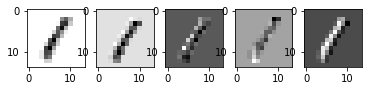

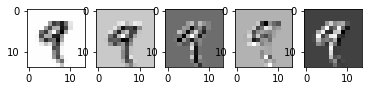

In [57]:
img_tf = tf.convert_to_tensor(img)
#print(img_tf.shape)
#print(img_tf)
weight_init = keras.initializers.RandomNormal(stddev=0.01)
#print(weight_init)
conv2d = tf.keras.layers.Conv2D(filters=5, kernel_size=3,padding='same',
                               strides=(2,2),kernel_initializer = weight_init)(img_tf)
print("conv2d.shape: ", conv2d.shape)
for i, map in enumerate(conv2d):
    #print(i,":",map.shape)
    map = np.swapaxes(map,1,2)
    map = np.swapaxes(map,0,1)
    for j, img in enumerate(map):
        #print(j,":",img.shape)
        plt.subplot(1,5,j+1), plt.imshow(img, cmap='gray')
    plt.show()
    

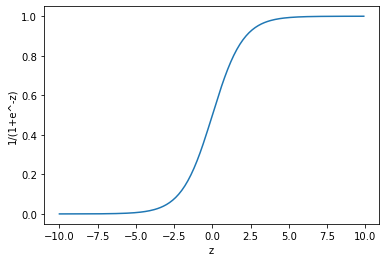

In [59]:
zs = np.arange(-10,10,0.1)
gs = [1 / (1 + np.exp(-z)) for z in zs]

plt.plot(zs,gs)
plt.xlabel('z')
plt.ylabel('1/(1+e^-z)')
plt.show()

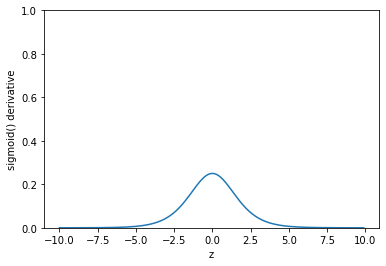

In [61]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


zs = np.arange(-10.,10., 0.1)
gs = [ sigmoid(z) *(1-sigmoid(z)) for z in zs ]
plt.plot(zs,gs)
plt.ylim(0,1)
plt.xlabel('z')
plt.ylabel('sigmoid() derivative')
plt.show()

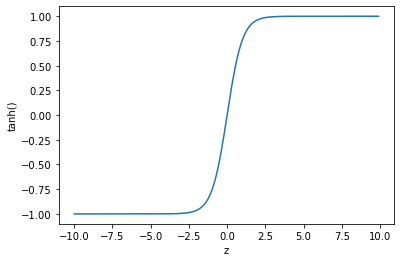

In [62]:
zs = np.arange(-10.,10., 0.1)
gs = [ np.tanh(z) for z in zs]
plt.plot(zs,gs)
plt.xlabel('z')
plt.ylabel('tanh()')
plt.show()

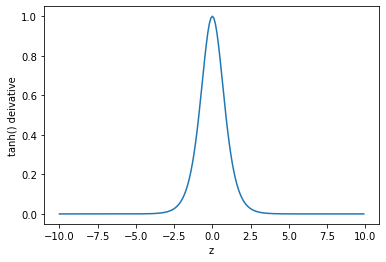

In [63]:
zs = np.arange(-10.,10., 0.1)
gs = [ (1 - np.tanh(z))*(1+np.tanh(z)) for z in zs ]
plt.plot(zs,gs)
plt.xlabel('z')
plt.ylabel('tanh() deivative')
plt.show()

In [66]:
def relu(x):
    return np.maximum(x,0)

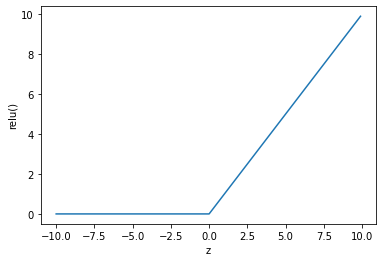

In [67]:
zs = np.arange(-10.,10.,0.1)
gs = [ relu(z) for z in zs]
plt.plot(zs,gs)
plt.xlabel('z')
plt.ylabel('relu()')
plt.show()

In [68]:
import tensorflow as tf

class ConvolutionNetwork:
    
    def __init__(self, n_kernels=10, units=10, batch_size=32, learning_rate=0.1):
        self.n_kernels = n_kernels  # 합성곱의 커널 개수
        self.kernel_size = 3        # 커널 크기
        self.optimizer = None       # 옵티마이저
        self.conv_w = None          # 합성곱 층의 가중치
        self.conv_b = None          # 합성곱 층의 절편
        self.units = units          # 은닉층의 뉴런 개수
        self.batch_size = batch_size  # 배치 크기
        self.w1 = None              # 은닉층의 가중치
        self.b1 = None              # 은닉층의 절편
        self.w2 = None              # 출력층의 가중치
        self.b2 = None              # 출력층의 절편
        self.a1 = None              # 은닉층의 활성화 출력
        self.losses = []            # 훈련 손실
        self.val_losses = []        # 검증 손실
        self.lr = learning_rate     # 학습률

    def forpass(self, x):
        # 3x3 합성곱 연산을 수행합니다.
#         print('x.shape',x.shape)
#         print('self.conv_w.shape',self.conv_w.shape)
#         print('self.conv_w',self.conv_w)
        c_out = tf.nn.conv2d(x, self.conv_w, strides=1, padding='SAME') + self.conv_b
        # 렐루 활성화 함수를 적용합니다.
#         print('c_out.shape',c_out.shape)
#         print('c_out',c_out)
        r_out = tf.nn.relu(c_out)
#         print('r_out.shape',r_out.shape)
#         print('r_out',r_out)
        # 2x2 최대 풀링을 적용합니다.
        p_out = tf.nn.max_pool2d(r_out, ksize=2, strides=2, padding='VALID')
        # 첫 번째 배치 차원을 제외하고 출력을 일렬로 펼칩니다.
#         print('p_out.shape',p_out.shape)
#         print('p_out',p_out)
        f_out = tf.reshape(p_out, [x.shape[0], -1])
#         print('f_out.shape',f_out.shape)
        z1 = tf.matmul(f_out, self.w1) + self.b1     # 첫 번째 층의 선형 식을 계산합니다
        a1 = tf.nn.relu(z1)                          # 활성화 함수를 적용합니다
        z2 = tf.matmul(a1, self.w2) + self.b2        # 두 번째 층의 선형 식을 계산합니다.
        return z2
    
    def init_weights(self, input_shape, n_classes):
        g = tf.initializers.glorot_uniform()
        self.conv_w = tf.Variable(g((3, 3, 1, self.n_kernels)))
        self.conv_b = tf.Variable(np.zeros(self.n_kernels), dtype=float)
        n_features = 14 * 14 * self.n_kernels
        self.w1 = tf.Variable(g((n_features, self.units)))          # (특성 개수, 은닉층의 크기)
        self.b1 = tf.Variable(np.zeros(self.units), dtype=float)    # 은닉층의 크기
        self.w2 = tf.Variable(g((self.units, n_classes)))           # (은닉층의 크기, 클래스 개수)
        self.b2 = tf.Variable(np.zeros(n_classes), dtype=float)     # 클래스 개수
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        self.init_weights(x.shape, y.shape[1])    # 은닉층과 출력층의 가중치를 초기화합니다.
        self.optimizer = tf.optimizers.SGD(learning_rate=self.lr)
        # epochs만큼 반복합니다.
        for i in range(epochs):
            print('에포크', i, end=' ')
            # 제너레이터 함수에서 반환한 미니배치를 순환합니다.
            batch_losses = []
            for x_batch, y_batch in self.gen_batch(x, y):
                print('.', end='')
                self.training(x_batch, y_batch)
                # 배치 손실을 기록합니다.
                batch_losses.append(self.get_loss(x_batch, y_batch))
 
            print()
            # 배치 손실 평균내어 훈련 손실 값으로 저장합니다.
            self.losses.append(np.mean(batch_losses))
            # 검증 세트에 대한 손실을 계산합니다.
            self.val_losses.append(self.get_loss(x_val, y_val))

    # 미니배치 제너레이터 함수
    def gen_batch(self, x, y):
        bins = len(x) // self.batch_size                   # 미니배치 횟수
        indexes = np.random.permutation(np.arange(len(x))) # 인덱스를 섞습니다.
        x = x[indexes]
        y = y[indexes]
        for i in range(bins):
            start = self.batch_size * i
            end = self.batch_size * (i + 1)
            yield x[start:end], y[start:end]   # batch_size만큼 슬라이싱하여 반환합니다.
            
    def training(self, x, y):
        m = len(x)                    # 샘플 개수를 저장합니다.
        with tf.GradientTape() as tape:
            z = self.forpass(x)       # 정방향 계산을 수행합니다.
            # 손실을 계산합니다.
            loss = tf.nn.softmax_cross_entropy_with_logits(y, z)
            loss = tf.reduce_mean(loss)

        weights_list = [self.conv_w, self.conv_b,
                        self.w1, self.b1, self.w2, self.b2]
        # 가중치에 대한 그래디언트를 계산합니다.
        grads = tape.gradient(loss, weights_list)
        # 가중치를 업데이트합니다.
        self.optimizer.apply_gradients(zip(grads, weights_list))
   
    def predict(self, x):
        z = self.forpass(x)                 # 정방향 계산을 수행합니다.
        return np.argmax(z.numpy(), axis=1) # 가장 큰 값의 인덱스를 반환합니다.
    
    def score(self, x, y):
        # 예측과 타깃 열 벡터를 비교하여 True의 비율을 반환합니다.
        return np.mean(self.predict(x) == np.argmax(y, axis=1))

    def get_loss(self, x, y):
        z = self.forpass(x)                 # 정방향 계산을 수행합니다.
        # 손실을 계산하여 저장합니다.
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, z))
        return loss.numpy()

In [69]:
(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


In [70]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, 
test_size=0.2, random_state=42)

In [71]:
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)


In [72]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)

In [73]:
x_train.shape


(48000, 28, 28, 1)

In [74]:
x_train = x_train / 255
x_val = x_val / 255

In [75]:
cn = ConvolutionNetwork(n_kernels=10, units=100, batch_size=128, learning_rate=0.01)
cn.fit(x_train, y_train_encoded, 
x_val=x_val, y_val=y_val_encoded, epochs=20)

에포크 0 .......................................................................................................................................................................................................................................................................................................................................................................................
에포크 1 .......................................................................................................................................................................................................................................................................................................................................................................................
에포크 2 ......................................................................................................................................................................................................................................

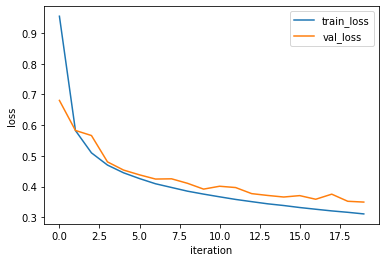

In [76]:
import matplotlib.pyplot as plt
plt.plot(cn.losses)
plt.plot(cn.val_losses)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train_loss', 'val_loss'])
plt.show()

In [77]:
cn.score(x_val, y_val_encoded)

0.8794166666666666

In [78]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [79]:
conv1 = tf.keras.Sequential()
conv1.add(Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))

In [80]:
conv1.add(MaxPooling2D((2, 2)))

In [81]:
conv1.add(Flatten())


In [82]:
conv1.add(Dense(100, activation='relu'))
conv1.add(Dense(10, activation='softmax'))

In [83]:
conv1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 28, 28, 10)        100       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 1960)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               196100    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 197,210
Trainable params: 197,210
Non-trainable params: 0
_________________________________________________________________


In [84]:
conv1.compile(optimizer='adam', loss='categorical_crossentropy',
metrics=['accuracy'])

In [85]:
history = conv1.fit(x_train, y_train_encoded, epochs=20, 
validation_data=(x_val, y_val_encoded))

Epoch 1/20
1500/1500 [==============================] - 19s 13ms/step - loss: 0.4510 - accuracy: 0.8426 - val_loss: 0.3394 - val_accuracy: 0.8824
Epoch 2/20
1500/1500 [==============================] - 20s 13ms/step - loss: 0.3130 - accuracy: 0.8880 - val_loss: 0.3113 - val_accuracy: 0.8870
Epoch 3/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2684 - accuracy: 0.9021 - val_loss: 0.2958 - val_accuracy: 0.8945
Epoch 4/20
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2336 - accuracy: 0.9133 - val_loss: 0.2597 - val_accuracy: 0.9088
Epoch 5/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2098 - accuracy: 0.9227 - val_loss: 0.2611 - val_accuracy: 0.9092
Epoch 6/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1889 - accuracy: 0.9303 - val_loss: 0.2576 - val_accuracy: 0.9073
Epoch 7/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1691 - accuracy: 0.9379 - val_loss: 0.2482 - val

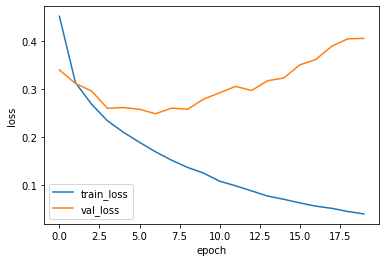

In [86]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()


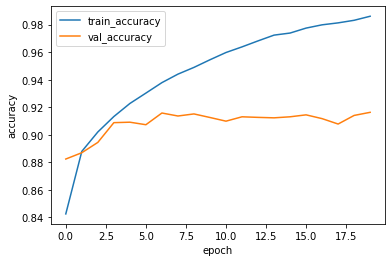

In [87]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()


In [91]:
from tensorflow.keras.layers import Dropout
conv2 = tf.keras.Sequential()
conv2.add(Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
conv2.add(MaxPooling2D((2, 2)))
conv2.add(Flatten())
conv2.add(Dropout(0.25))
conv2.add(Dense(100, activation='relu'))
conv2.add(Dense(10, activation='softmax'))

In [92]:
conv2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 28, 28, 10)        100       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1960)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1960)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               196100    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 197,210
Trainable params: 197,210
Non-trainable params: 0
________________________________________________

In [93]:
conv2.compile(optimizer='adam', loss='categorical_crossentropy',
metrics=['accuracy'])
history = conv2.fit(x_train, y_train_encoded, epochs=20, 
validation_data=(x_val, y_val_encoded))


Epoch 1/20
1500/1500 [==============================] - 17s 11ms/step - loss: 0.4882 - accuracy: 0.8252 - val_loss: 0.3432 - val_accuracy: 0.8785
Epoch 2/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3491 - accuracy: 0.8726 - val_loss: 0.3021 - val_accuracy: 0.8923
Epoch 3/20
1500/1500 [==============================] - 14s 9ms/step - loss: 0.3030 - accuracy: 0.8891 - val_loss: 0.2778 - val_accuracy: 0.8990
Epoch 4/20
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2743 - accuracy: 0.8991 - val_loss: 0.2651 - val_accuracy: 0.9042
Epoch 5/20
1500/1500 [==============================] - 14s 9ms/step - loss: 0.2523 - accuracy: 0.9057 - val_loss: 0.2619 - val_accuracy: 0.9059
Epoch 6/20
1500/1500 [==============================] - 13s 8ms/step - loss: 0.2331 - accuracy: 0.9133 - val_loss: 0.2720 - val_accuracy: 0.9018
Epoch 7/20
1500/1500 [==============================] - 11s 8ms/step - loss: 0.2174 - accuracy: 0.9186 - val_loss: 0.2354 - val